In [136]:
import cPickle as pickle
import h5py

def PlotSpec(start, stop,labels, keys, ylim, colors, dm=True):
    
    #models = ['../mod_c/base_2D_XCO_stripped.hdf5'] + ['mod_k_%i_XCO_stripped.hdf5'%i for i in range(start, stop)]
    models = ['mod_k_%i_XCO_stripped.hdf5'%i for i in range(start, stop)]
    
    for i, model in enumerate(models):
        if i%2==0:
            h = h5py.File('../mod_c/'+model)
            if dm is True:
                fit = h['/fit_results/GC'].attrs
            else:
                fit = h['/fit_results/GC_no_dm'].attrs
            #print fit.keys()
            
            for j, key in enumerate(keys):
                lab = None
                if i == 10:
                    lab = key.replace('flux_',"").replace('_','+')
                plt.loglog(fit['energies']/1e3, fit['energies']**2*fit[key]/1e3,label=lab,alpha=(i+2)/(stop-start+2.), c=colors[j])
                    
    if start<43:
        plt.text(.4,.95, 'PEB HI + H$_2$', transform=plt.gca().transAxes, fontsize=10)
    else: 
        plt.text(.4,.95, 'GALPROP HI + H2', transform=plt.gca().transAxes, fontsize=10)
    #fit_no_dm = h['/fit_results/GC_no_dm'].attrs
    
    
    plt.legend(frameon=False, fontsize=10, ncol=1)        
            
    plt.ylim(ylim)
    plt.xlim(3e-1,2.5e2)
    plt.ylabel(r'$\rm{E^2\ dN/dE\ [GeV/cm^2/s/sr]}$')
    plt.xlabel(r'$\rm{E\ [GeV]}$')
    

#Varying f_sprl (light to dark is increasing f_sprl 0.0 - 0.5 in .1 increments
## With DM included in the fit

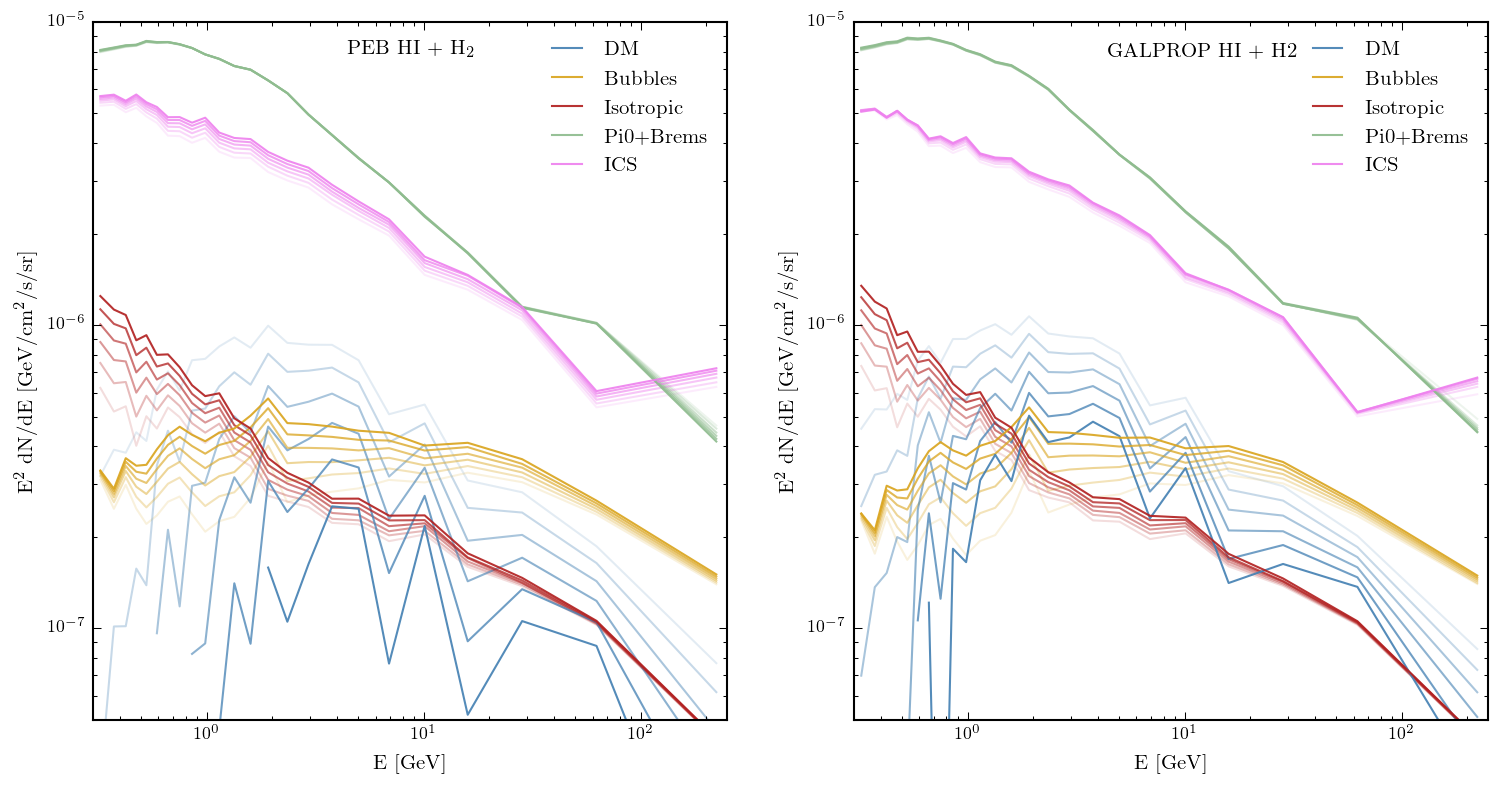

In [137]:
plt.figure(figsize=(12,6))

components = ['flux_DM', 'flux_Bubbles', 'flux_Isotropic',u'flux_Pi0_Brems', u'flux_ICS']
colors = ['steelblue','goldenrod','firebrick', 'darkseagreen','violet']


plt.subplot(1, 2, 1)
PlotSpec(0,11,labels=[r'$F_{sprl}=%1.3f$'%i for i in np.linspace(0,.5,11)], keys=components, ylim=(5e-8,1e-5), colors=colors)
plt.subplot(1, 2, 2)
PlotSpec(43,54,labels=[r'$F_{sprl}=%1.3f$'%i for i in np.linspace(0,.5,11)], keys=components, ylim=(5e-8,1e-5), colors=colors)


##Without DM in the fit 

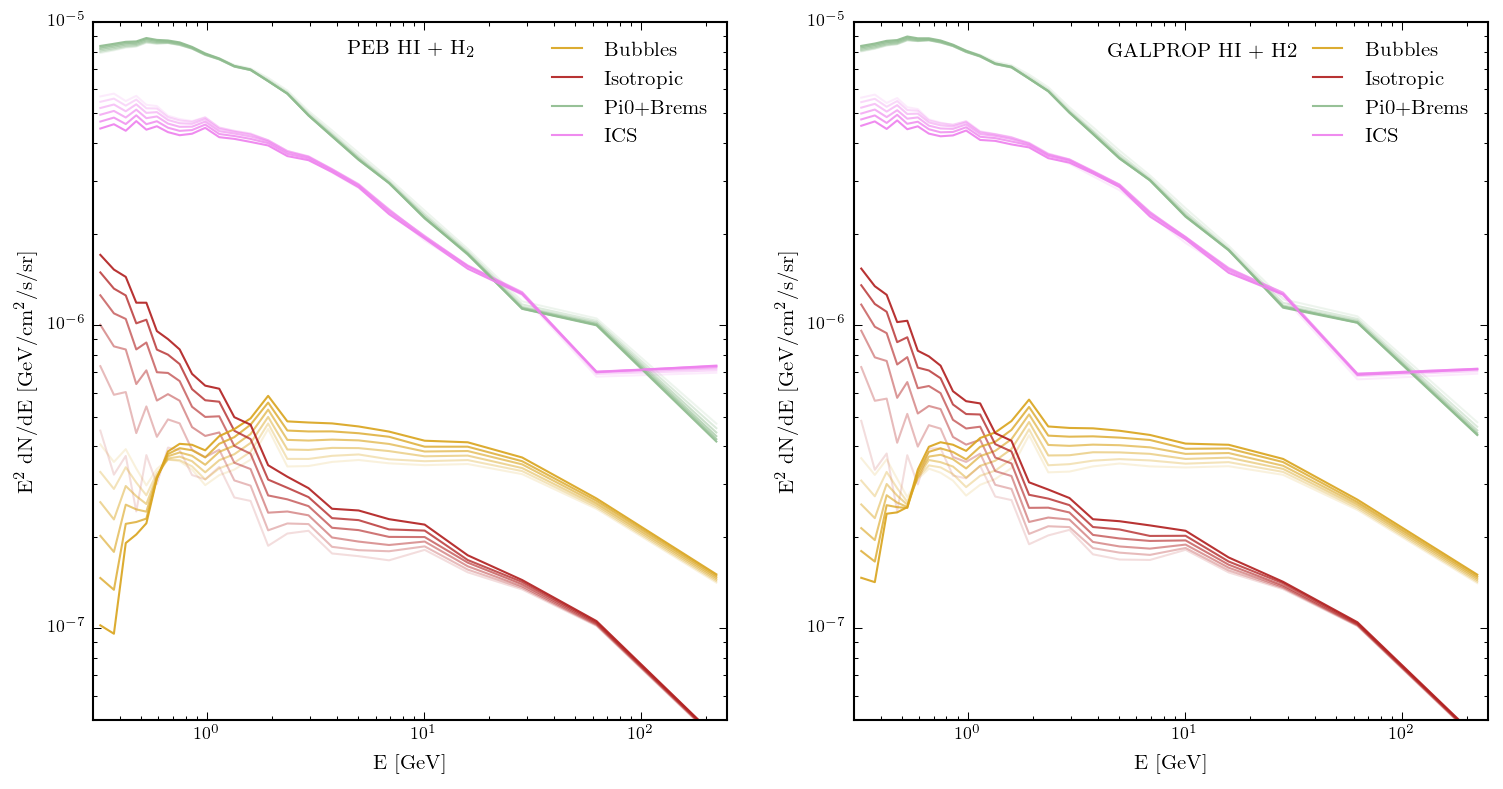

In [138]:
plt.figure(figsize=(12,6))

components = [ 'flux_Bubbles', 'flux_Isotropic',u'flux_Pi0_Brems', u'flux_ICS']
colors = ['goldenrod','firebrick', 'darkseagreen','violet']

plt.subplot(1, 2, 1)
PlotSpec(0,11,labels=[r'$F_{sprl}=%1.3f$'%i for i in np.linspace(0,.5,11)], keys=components, ylim=(5e-8,1e-5), colors=colors, dm=False)
plt.subplot(1, 2, 2)
PlotSpec(43,54,labels=[r'$F_{sprl}=%1.3f$'%i for i in np.linspace(0,.5,11)], keys=components, ylim=(5e-8,1e-5), colors=colors, dm=False)
